In [10]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# 加载鸢尾花数据集
iris = load_iris()
iris_data = iris.data
iris_target = iris.target.reshape(-1, 1)


In [11]:
# 加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(120, 4) (30, 4) (120, 1) (30, 1)


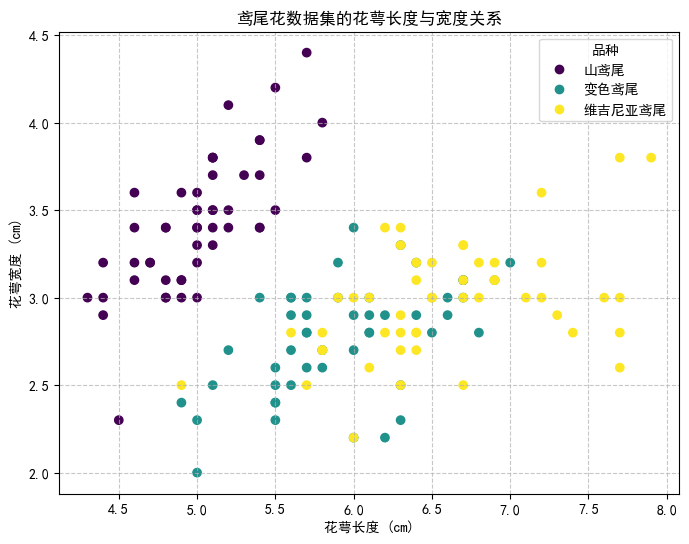

In [15]:
# 以花萼长度为横轴，花萼长度为纵轴绘制数据的散点图
import matplotlib.pyplot as plt

iris_df = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=iris.feature_names + ['target'])

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False     # 用来正常显示负号

# 创建散点图
plt.figure(figsize=(8, 6))
scatter = plt.scatter(iris_df['sepal length (cm)'],  # 花萼长度
                     iris_df['sepal width (cm)'],    # 花萼宽度
                     c=iris_df['target'],            # 根据目标值着色
                     cmap='viridis')                 # 使用viridis颜色映射

# 添加标题和轴标签
plt.title('鸢尾花数据集的花萼长度与宽度关系')
plt.xlabel('花萼长度 (cm)')
plt.ylabel('花萼宽度 (cm)')

# 添加图例
plt.legend(handles=scatter.legend_elements()[0], 
          labels=['山鸢尾', '变色鸢尾', '维吉尼亚鸢尾'],
          title='品种')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()


各主成分解释的方差比例： [0.92461872 0.05306648]
累计解释的方差比例： 0.9776852063187949


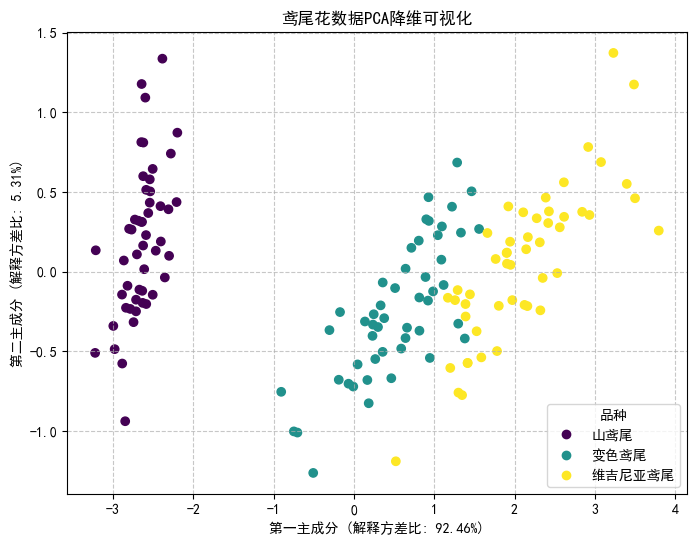

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 创建PCA对象并拟合转换数据
pca = PCA(n_components=2)  # 降至2维
X_pca = pca.fit_transform(iris_data)

# 计算每个主成分解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_
print("各主成分解释的方差比例：", explained_variance_ratio)
print("累计解释的方差比例：", sum(explained_variance_ratio))

# 创建散点图
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=iris_target,           # 根据目标值着色
                     cmap='viridis')

# 设置标题和轴标签
plt.title('鸢尾花数据PCA降维可视化')
plt.xlabel(f'第一主成分 (解释方差比: {explained_variance_ratio[0]:.2%})')
plt.ylabel(f'第二主成分 (解释方差比: {explained_variance_ratio[1]:.2%})')

# 添加图例
plt.legend(handles=scatter.legend_elements()[0],
          labels=['山鸢尾', '变色鸢尾', '维吉尼亚鸢尾'],
          title='品种')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3) # k=3
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# 计算准确率
ac = accuracy_score(y_test, y_pred)
print(f"准确率: {ac:.2%}")

准确率: 100.00%


c:\Users\89172\anaconda3\envs\tmp\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
